In [2]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import powerlaw

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### Lets find numerically the relation between

The Stable Rank (in log units) and the Power Law exponent (we fit) $\alpha$

$$\dfrac{\log\Vert W\Vert^{2}}{\log\lambda_{max}}\;\;\;vs\;\;\alpha$$

In [3]:
from IPython.core.display import display, HTML
html = '<table><tr><th>mu</th><th>alpha</th><th>logNorm</th><th>formula</th><th>ratio</th></tr>'
#mus, ratios, alphas =  [], [], []
Mresults = {}
for M in [100, 500, 1000, 5000, 10000]:        
    ratios, alphas =  [], []

    #N = (np.random.randint(3)+1)*M
    N = M
    for mu in [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4, 4.5, 5]:
    # mu = 5 * np.random.random_sample() + 0.5

        print("N, M {}x{} mu: {}".format(N, M, mu))

        W = np.random.pareto(a=mu,size=(N,M))
        normW = np.linalg.norm(W, ord='fro')#/np.sqrt(N)

        logNorm2 = 2.0*np.log10(normW)

        X=np.dot(W.T,W)/N
        print(X.shape)
        evals = np.linalg.eigvals(X)

        l_max, l_min = np.max(evals), np.min(evals)
        fit =  powerlaw.Fit(evals)

        a = fit.alpha
        alphas.append(a)

        ratio = logNorm2/np.log10(l_max)
        ratios.append(ratio)

        Mresults[M]=[ratios,alphas]

            #print("mu= {} 1+mu/2 = {}, alpha= {:2f} logNorm2= {:2f}  formula= {:2f} ratio= {:2f}"
            #      .format(mu,(1+mu/2),fit.alpha, logNorm2, formula, ratio ))

    #html += "<tr><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td><td>{:.3f}</td></tr>".format(mu, fit.alpha, logNorm2, formula, ratio)

#html += "</table>"
#display(HTML(html))

N, M 100x100 mu: 0.5
(100, 100)
N, M 100x100 mu: 0.75
(100, 100)
N, M 100x100 mu: 1.0
(100, 100)
N, M 100x100 mu: 1.25
(100, 100)
N, M 100x100 mu: 1.5
(100, 100)
N, M 100x100 mu: 1.75
(100, 100)
N, M 100x100 mu: 2.0
(100, 100)
N, M 100x100 mu: 2.25
(100, 100)
N, M 100x100 mu: 2.5
(100, 100)
N, M 100x100 mu: 2.75
(100, 100)
N, M 100x100 mu: 3.0
(100, 100)


Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


N, M 100x100 mu: 3.25
(100, 100)
N, M 100x100 mu: 3.5
(100, 100)
N, M 100x100 mu: 4
(100, 100)
N, M 100x100 mu: 4.5
(100, 100)
N, M 100x100 mu: 5
(100, 100)
N, M 500x500 mu: 0.5
(500, 500)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1141: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1160: RuntimeWarning: invalid value encountered in log
  return 1 + len(data)/sum(log(data / (self.xmin)))
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:701: RuntimeWarning: overflow encountered in double_scalars
  )[1:]
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Calculating best minimal va

N, M 500x500 mu: 0.75
(500, 500)
N, M 500x500 mu: 1.0
(500, 500)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


N, M 500x500 mu: 1.25
(500, 500)
N, M 500x500 mu: 1.5
(500, 500)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


N, M 500x500 mu: 1.75
(500, 500)
N, M 500x500 mu: 2.0
(500, 500)


Calculating best minimal value for power law fit


N, M 500x500 mu: 2.25
(500, 500)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


N, M 500x500 mu: 2.5
(500, 500)
N, M 500x500 mu: 2.75
(500, 500)
N, M 500x500 mu: 3.0

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit



(500, 500)
N, M 500x500 mu: 3.25
(500, 500)


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


N, M 500x500 mu: 3.5
(500, 500)
N, M 500x500 mu: 4
(500, 500)
N, M 500x500 mu: 4.5


Calculating best minimal value for power law fit


(500, 500)


Calculating best minimal value for power law fit


N, M 500x500 mu: 5
(500, 500)
N, M 1000x1000 mu: 0.5


Calculating best minimal value for power law fit


(1000, 1000)


/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:1141: RuntimeWarning: invalid value encountered in log
  self.alpha = 1 + (self.n / sum(log(data/self.xmin)))


N, M 1000x1000 mu: 0.75
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 1.0
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 1.25
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 1.5
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 1.75
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 2.0
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 2.25
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 2.5
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 2.75
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 3.0
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 3.25
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 3.5
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 4
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 4.5
(1000, 1000)


Calculating best minimal value for power law fit


N, M 1000x1000 mu: 5
(1000, 1000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 0.5
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 0.75
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 1.0
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 1.25
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 1.5
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 1.75
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 2.0
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 2.25
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 2.5
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 2.75
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 3.0
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 3.25
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 3.5
(5000, 5000)


Calculating best minimal value for power law fit
/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


N, M 5000x5000 mu: 4
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 4.5
(5000, 5000)


Calculating best minimal value for power law fit


N, M 5000x5000 mu: 5
(5000, 5000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 0.5
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 0.75
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 1.0
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 1.25
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 1.5
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 1.75
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 2.0
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 2.25
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 2.5
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 2.75
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 3.0
(10000, 10000)


Calculating best minimal value for power law fit


N, M 10000x10000 mu: 3.25
(10000, 10000)


KeyboardInterrupt: 

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


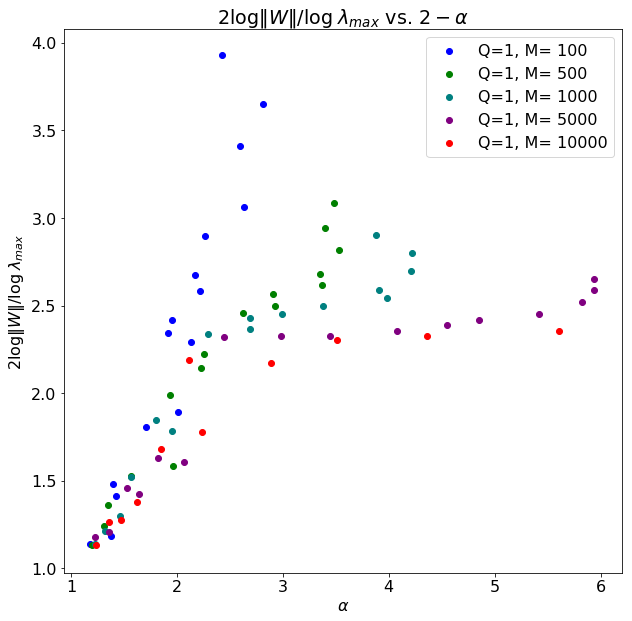

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$2\log\Vert W\Vert / \log\;\lambda_{max}$ vs. $2-\alpha\;$")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$2\log\Vert W\Vert / \log\;\lambda_{max}$")

colors=['red','green', 'teal']

M=100
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color='blue')

M=500
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color='green')


M=1000
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color='teal')

  
M=5000
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color='purple')

M=10000
[ratios,alphas] = Mresults[M]
plt.scatter(alphas, ratios, label="Q=1, M= {}".format(M), color='red')


plt.legend()

#plt.xlim([1,5])
#plt.ylim([1,5])
plt.savefig("img/Alpha-LogNorm-Relations.png")

/Users/charleshmartin/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


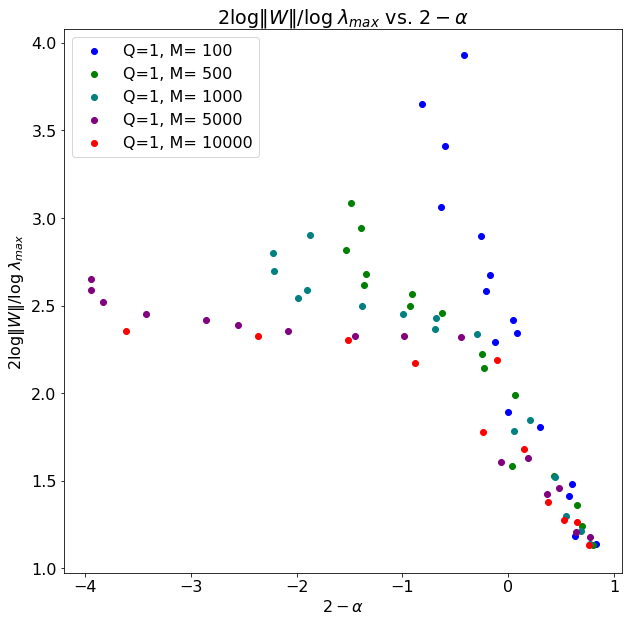

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams.update({'font.size': 16})

plt.title(r"$2\log\Vert W\Vert / \log\;\lambda_{max}$ vs. $2-\alpha\;$")
plt.xlabel(r"$2-\alpha$")
plt.ylabel(r"$2\log\Vert W\Vert / \log\;\lambda_{max}$")

colors=['red','green', 'teal']

M=100
[ratios,alphas] = Mresults[M]
x = -np.array(alphas)+2.0
plt.scatter(x, ratios, label="Q=1, M= {}".format(M), color='blue')

M=500
[ratios,alphas] = Mresults[M]
x = -np.array(alphas)+2.0
plt.scatter(x, ratios, label="Q=1, M= {}".format(M), color='green')


M=1000
[ratios,alphas] = Mresults[M]
x = -np.array(alphas)+2.0
plt.scatter(x, ratios, label="Q=1, M= {}".format(M), color='teal')

  
M=5000
[ratios,alphas] = Mresults[M]
x = -np.array(alphas)+2.0
plt.scatter(x, ratios, label="Q=1, M= {}".format(M), color='purple')

M=10000
[ratios,alphas] = Mresults[M]
x = -np.array(alphas)+2.0
plt.scatter(x, ratios, label="Q=1, M= {}".format(M), color='red')


plt.legend()

#plt.xlim([1,5])
#plt.ylim([1,5])
plt.savefig("img/Alpha-LogNorm-Relations-2ma.png")